# PCA for swiss roll

This notebook provides an example of PCA with random Fourier features (RFFPCA).

In [1]:
import numpy as np
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt

# Import rfflearn.
import rfflearn.cpu as rfflearn

# If you want to enable GPU, please import rfflearn like the following instead.
#import rfflearn.gpu as rfflearn

## Generate swiss roll dataset

In [2]:
# Define the number of samples.
n_samples = 10000

# Generate swiss roll dataset.
X, color = sklearn.datasets.make_swiss_roll(n_samples)

## Train and evaluate a PCA model

### Instanciate a PCA model

* `sklearn.decomposition.PCA`: Linear PCA from Scikit-learn.
* `sklearn.decomposition.KernelPCA`: Kernel PCA from Scikit-learn.
* `RFFPCA`: PCA with random Fourier features. It shows slightly better test accuracy and pretty fast inference speed than SVC.
* `ORFPCA`: Similar to RFFPCA, but orthogonal random features are used.
* `QRFPCA`: Similar to RFFPCA, but quasi-random numbers are used.

In [3]:
# Linear PCA.
# pca = sklearn.decomposition.PCA(n_components=2)

# Kernel PCA.
# pca = sklearn.decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=0.1)

# PCA with random Fourier features.
pca = rfflearn.RFFPCA(n_components=2, dim_kernel=1024, std_kernel=0.06)

# PCA with orthogonal random features.
# pca = rfflearn.ORFPCA(n_components=2, dim_kernel=1024, std_kernel=0.06)

# PCA with quasi-random Fourier features.
# pca = rfflearn.QRFPCA(n_components=2, dim_kernel=1024, std_kernel=0.06)

### Train the PCA model

In [4]:
X_p = pca.fit_transform(X)

### Visualize the compressed data

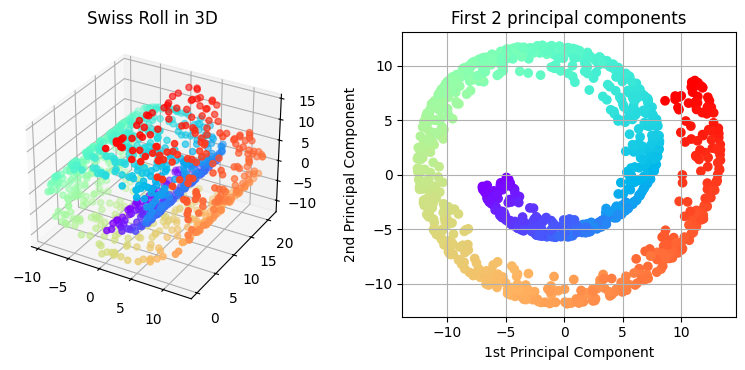

In [5]:
# Draw input data in 3D.
fig = plt.figure(figsize=(8, 4))
ax  = fig.add_subplot(121, projection="3d")
ax.scatter(X[::10, 0], X[::10, 1], X[::10, 2], c=color[::10], cmap=plt.cm.rainbow)
ax.set_title("Swiss Roll in 3D")

# Draw PCA results.
ax = fig.add_subplot(122)
ax.scatter(X_p[::10, 0], X_p[::10, 1], c=color[::10], cmap=plt.cm.rainbow)
ax.set_title("First 2 principal components")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.grid(True)

plt.tight_layout(pad=1.8)
plt.show()